# Import

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import RegressorMixin, TransformerMixin
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet, ElasticNetCV

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate, KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import TimeSeriesSplit

## Data

In [3]:
denver_df = pd.read_csv('../../Data/Clean/combined/Denver_combined.csv')
atlanta_df = pd.read_csv('../../Data/Clean/combined/Atlanta_combined.csv')
charlotte_df = pd.read_csv('../../Data/Clean/combined/Charlotte_combined.csv')
cincinnati_df = pd.read_csv('../../Data/Clean/combined/Cincinnati_combined.csv')
indi_df = pd.read_csv('../../Data/Clean/combined/Indianapolis_combined.csv')
prov_df = pd.read_csv('../../Data/Clean/combined/Providence_combined.csv')
tampa_df = pd.read_csv('../../Data/Clean/combined/Tampa_combined.csv')
total_cities_df = pd.read_csv('../../Data/Clean/combined/all_cities_combined.csv')

In [4]:
denver_df

,DATE,MeanSalePrice,SalesCount,TotalTransactionValue,HomeValueIndex,HomeValueIndexSmSa,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,...,PctSoldBelowList,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE,NUM_JOBS,GROWTH_PCT,People25PlusThousands_2019,PctHighSchoolDiploma_2019,PctBachelorsDegree_2019,CityName
0,2008-04-30,245069.0,4305.0,9.275848e+08,239786.727396,243635.279120,NaN,NaN,NaN,NaN,...,NaN,5.465,5.918,0.452,1259.0,1.0,2434.5429,91.688128,49.747029,"DENVER, CO"
1,2008-05-31,242919.0,4779.0,1.043794e+09,240755.620219,242719.130794,NaN,NaN,NaN,NaN,...,NaN,5.600,6.036,0.436,1256.8,-1.0,2434.5429,91.688128,49.747029,"DENVER, CO"
2,2008-06-30,245529.0,4789.0,1.136320e+09,241296.223700,241952.165191,NaN,NaN,NaN,NaN,...,NaN,5.910,6.320,0.410,1258.2,-0.6,2434.5429,91.688128,49.747029,"DENVER, CO"
3,2008-07-31,247607.0,4922.0,1.195890e+09,240843.494803,240801.464621,NaN,NaN,NaN,NaN,...,NaN,5.972,6.426,0.454,1256.1,-1.0,2434.5429,91.688128,49.747029,"DENVER, CO"
4,2008-08-31,246384.0,4333.0,1.154412e+09,239424.931087,239672.270501,NaN,NaN,NaN,NaN,...,NaN,6.025,6.478,0.452,1256.2,-0.2,2434.5429,91.688128,49.747029,"DENVER, CO"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2024-02-29,635082.0,2767.0,1.507124e+09,572034.304896,588450.438544,74.0,28.0,44.0,16524.040586,...,0.497816,6.102,6.776,0.674,NaN,NaN,2434.5429,91.688128,49.747029,"DENVER, CO"
191,2024-03-31,654724.0,3327.0,1.776480e+09,580597.558905,588917.680727,72.0,28.0,36.0,17538.582027,...,0.441306,6.175,6.820,0.645,1627.7,0.5,2434.5429,91.688128,49.747029,"DENVER, CO"
192,2024-04-30,682101.0,3660.0,2.225136e+09,588155.609179,590109.794947,68.0,28.0,28.0,18508.070754,...,0.386085,6.263,6.992,0.730,1621.2,-1.1,2434.5429,91.688128,49.747029,"DENVER, CO"
193,2024-05-31,695652.0,4050.0,2.560065e+09,591315.674562,590809.175996,62.0,28.0,24.0,18943.332922,...,0.371205,6.346,7.060,0.714,1623.4,-1.0,2434.5429,91.688128,49.747029,"DENVER, CO"


In [5]:
atlanta_df

,DATE,MeanSalePrice,SalesCount,TotalTransactionValue,HomeValueIndex,HomeValueIndexSmSa,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,...,PctSoldBelowList,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE,NUM_JOBS,GROWTH_PCT,People25PlusThousands_2019,PctHighSchoolDiploma_2019,PctBachelorsDegree_2019,CityName
0,2008-04-30,200954.0,6463.0,1.235943e+09,185168.707578,189442.061550,NaN,NaN,NaN,NaN,...,NaN,5.465,5.918,0.452,2454.9,-3.5,4414.04779,89.810682,41.859123,"ATLANTA, GA"
1,2008-05-31,203419.0,6729.0,1.317605e+09,185331.245765,188426.220342,NaN,NaN,NaN,NaN,...,NaN,5.600,6.036,0.436,2450.9,-6.2,4414.04779,89.810682,41.859123,"ATLANTA, GA"
2,2008-06-30,205746.0,7047.0,1.388670e+09,185185.095114,187437.288971,NaN,NaN,NaN,NaN,...,NaN,5.910,6.320,0.410,2442.4,-6.1,4414.04779,89.810682,41.859123,"ATLANTA, GA"
3,2008-07-31,205553.0,7086.0,1.429205e+09,184692.089305,186253.861325,NaN,NaN,NaN,NaN,...,NaN,5.972,6.426,0.454,2434.6,-6.8,4414.04779,89.810682,41.859123,"ATLANTA, GA"
4,2008-08-31,202855.0,6383.0,1.388101e+09,183376.364934,184882.815462,NaN,NaN,NaN,NaN,...,NaN,6.025,6.478,0.452,2429.3,-7.2,4414.04779,89.810682,41.859123,"ATLANTA, GA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2024-02-29,417119.0,5786.0,2.329922e+09,375449.167431,382993.972281,59.0,25.0,52.0,14283.972658,...,0.546981,6.102,6.776,0.674,NaN,NaN,4414.04779,89.810682,41.859123,"ATLANTA, GA"
191,2024-03-31,425297.0,7173.0,2.565182e+09,379555.763978,384542.454662,57.0,25.0,48.0,14558.559916,...,0.523443,6.175,6.820,0.645,3077.4,3.7,4414.04779,89.810682,41.859123,"ATLANTA, GA"
192,2024-04-30,441775.0,7872.0,3.075744e+09,383260.753239,386333.204575,55.0,25.0,44.0,14676.181759,...,0.486013,6.263,6.992,0.730,3083.2,4.0,4414.04779,89.810682,41.859123,"ATLANTA, GA"
193,2024-05-31,454380.0,8275.0,3.536252e+09,385588.075165,387488.071665,51.0,25.0,41.0,15077.226143,...,0.462418,6.346,7.060,0.714,3085.8,5.1,4414.04779,89.810682,41.859123,"ATLANTA, GA"


In [6]:
charlotte_df

,DATE,MeanSalePrice,SalesCount,TotalTransactionValue,HomeValueIndex,HomeValueIndexSmSa,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,...,PctSoldBelowList,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE,NUM_JOBS,GROWTH_PCT,People25PlusThousands_2019,PctHighSchoolDiploma_2019,PctBachelorsDegree_2019,CityName
0,2008-04-30,191953.0,2856.0,5.033137e+08,178716.688988,181743.275129,NaN,NaN,NaN,NaN,...,NaN,5.465,5.918,0.452,1027.8,-1.2,1777.64019,91.950313,39.434102,"CHARLOTTE, NC"
1,2008-05-31,195297.0,2962.0,5.483343e+08,179423.191080,181545.123492,NaN,NaN,NaN,NaN,...,NaN,5.600,6.036,0.436,1026.8,-2.0,1777.64019,91.950313,39.434102,"CHARLOTTE, NC"
2,2008-06-30,198585.0,2963.0,5.815418e+08,179464.810356,181053.563638,NaN,NaN,NaN,NaN,...,NaN,5.910,6.320,0.410,1026.1,-1.3,1777.64019,91.950313,39.434102,"CHARLOTTE, NC"
3,2008-07-31,203829.0,2845.0,5.957602e+08,179255.088378,180331.749481,NaN,NaN,NaN,NaN,...,NaN,5.972,6.426,0.454,1024.6,-1.1,1777.64019,91.950313,39.434102,"CHARLOTTE, NC"
4,2008-08-31,204174.0,2530.0,5.681971e+08,178753.302909,179487.604132,NaN,NaN,NaN,NaN,...,NaN,6.025,6.478,0.452,1024.7,-0.7,1777.64019,91.950313,39.434102,"CHARLOTTE, NC"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2024-02-29,433595.0,2555.0,1.038559e+09,372700.413119,380362.214298,64.0,33.0,41.0,13817.155994,...,0.539799,6.102,6.776,0.674,NaN,NaN,1777.64019,91.950313,39.434102,"CHARLOTTE, NC"
191,2024-03-31,449701.0,3084.0,1.177712e+09,377375.496830,382371.348508,62.0,32.0,38.0,14145.867037,...,0.509079,6.175,6.820,0.645,1362.2,0.8,1777.64019,91.950313,39.434102,"CHARLOTTE, NC"
192,2024-04-30,468689.0,3377.0,1.413361e+09,381017.828931,384493.452328,59.0,33.0,34.0,15234.182228,...,0.461565,6.263,6.992,0.730,1369.1,2.3,1777.64019,91.950313,39.434102,"CHARLOTTE, NC"
193,2024-05-31,490187.0,3732.0,1.669519e+09,383837.461738,386114.169028,55.0,33.0,30.0,15476.571448,...,0.450634,6.346,7.060,0.714,1373.8,3.4,1777.64019,91.950313,39.434102,"CHARLOTTE, NC"


In [7]:
cincinnati_df

,DATE,MeanSalePrice,SalesCount,TotalTransactionValue,HomeValueIndex,HomeValueIndexSmSa,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,...,PctSoldBelowList,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE,NUM_JOBS,GROWTH_PCT,People25PlusThousands_2019,PctHighSchoolDiploma_2019,PctBachelorsDegree_2019,CityName
0,2008-04-30,155566.0,1939.0,278000302.0,154159.712821,157939.052238,NaN,NaN,NaN,NaN,...,NaN,5.465,5.918,0.452,1047.0,-1.8,1418.62244,93.921524,43.323481,"CINCINNATI, OH"
1,2008-05-31,158474.0,2190.0,315975507.0,154896.973753,157678.462221,NaN,NaN,NaN,NaN,...,NaN,5.600,6.036,0.436,1045.6,-1.8,1418.62244,93.921524,43.323481,"CINCINNATI, OH"
2,2008-06-30,164199.0,2286.0,352017758.0,155768.803669,157332.615865,NaN,NaN,NaN,NaN,...,NaN,5.910,6.320,0.410,1041.2,-1.3,1418.62244,93.921524,43.323481,"CINCINNATI, OH"
3,2008-07-31,167422.0,2224.0,374100404.0,156376.821297,157143.826684,NaN,NaN,NaN,NaN,...,NaN,5.972,6.426,0.454,1045.1,-0.6,1418.62244,93.921524,43.323481,"CINCINNATI, OH"
4,2008-08-31,166249.0,2193.0,371690060.0,155577.849578,156653.274461,NaN,NaN,NaN,NaN,...,NaN,6.025,6.478,0.452,1043.8,-0.6,1418.62244,93.921524,43.323481,"CINCINNATI, OH"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2024-02-29,281555.0,1675.0,483039521.0,272688.384301,281327.059832,71.0,31.0,32.0,12611.327362,...,0.535159,6.102,6.776,0.674,NaN,NaN,1418.62244,93.921524,43.323481,"CINCINNATI, OH"
191,2024-03-31,285858.0,2166.0,517937450.0,277135.900656,283198.390034,72.0,30.0,27.0,13325.314496,...,0.508196,6.175,6.820,0.645,1156.1,-0.3,1418.62244,93.921524,43.323481,"CINCINNATI, OH"
192,2024-04-30,297765.0,2452.0,625901065.0,281432.137498,285301.781194,71.0,33.0,21.0,13889.847059,...,0.440154,6.263,6.992,0.730,1156.4,0.2,1418.62244,93.921524,43.323481,"CINCINNATI, OH"
193,2024-05-31,309705.0,2800.0,768929978.0,285067.538817,287108.719823,68.0,31.0,17.0,14909.143943,...,0.395867,6.346,7.060,0.714,1157.3,0.2,1418.62244,93.921524,43.323481,"CINCINNATI, OH"


In [8]:
indi_df

,DATE,MeanSalePrice,SalesCount,TotalTransactionValue,HomeValueIndex,HomeValueIndexSmSa,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,...,PctSoldBelowList,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE,NUM_JOBS,GROWTH_PCT,People25PlusThousands_2019,PctHighSchoolDiploma_2019,PctBachelorsDegree_2019,CityName
0,2008-04-30,149771.0,2151.0,291536100.0,131097.969553,133638.666266,NaN,NaN,NaN,NaN,...,NaN,5.465,5.918,0.452,956.7,0.2,1488.97601,90.664284,36.279526,"INDIANAPOLIS, IN"
1,2008-05-31,151827.0,2430.0,331352084.0,132148.045670,133520.379815,NaN,NaN,NaN,NaN,...,NaN,5.600,6.036,0.436,958.9,0.5,1488.97601,90.664284,36.279526,"INDIANAPOLIS, IN"
2,2008-06-30,154789.0,2438.0,362561539.0,132930.782306,133559.343193,NaN,NaN,NaN,NaN,...,NaN,5.910,6.320,0.410,958.2,0.3,1488.97601,90.664284,36.279526,"INDIANAPOLIS, IN"
3,2008-07-31,157222.0,2457.0,383886935.0,133222.597102,133449.285413,NaN,NaN,NaN,NaN,...,NaN,5.972,6.426,0.454,961.2,1.5,1488.97601,90.664284,36.279526,"INDIANAPOLIS, IN"
4,2008-08-31,154119.0,2309.0,370365976.0,133037.483397,133164.069995,NaN,NaN,NaN,NaN,...,NaN,6.025,6.478,0.452,959.9,0.3,1488.97601,90.664284,36.279526,"INDIANAPOLIS, IN"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2024-02-29,296139.0,1883.0,548900897.0,270729.765039,278403.822057,59.0,31.0,43.0,9887.606447,...,0.608638,6.102,6.776,0.674,NaN,NaN,1488.97601,90.664284,36.279526,"INDIANAPOLIS, IN"
191,2024-03-31,299987.0,2315.0,583584396.0,274032.097854,280072.846543,63.0,30.0,38.0,10397.380780,...,0.584681,6.175,6.820,0.645,1179.2,2.3,1488.97601,90.664284,36.279526,"INDIANAPOLIS, IN"
192,2024-04-30,306414.0,2613.0,698979265.0,277774.386332,281725.569422,63.0,32.0,31.0,10797.131320,...,0.527695,6.263,6.992,0.730,1180.9,2.4,1488.97601,90.664284,36.279526,"INDIANAPOLIS, IN"
193,2024-05-31,319174.0,2784.0,822403498.0,280550.634736,282983.774843,60.0,32.0,26.0,11030.089728,...,0.484892,6.346,7.060,0.714,1183.9,2.0,1488.97601,90.664284,36.279526,"INDIANAPOLIS, IN"


In [9]:
prov_df

,DATE,MeanSalePrice,SalesCount,TotalTransactionValue,HomeValueIndex,HomeValueIndexSmSa,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,...,PctSoldBelowList,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE,NUM_JOBS,GROWTH_PCT,People25PlusThousands_2019,PctHighSchoolDiploma_2019,PctBachelorsDegree_2019,CityName
0,2008-04-30,279826.0,1094.0,268863782.0,275076.989042,286193.357806,NaN,NaN,NaN,NaN,...,NaN,5.465,5.918,0.452,578.1,-0.9,5757.78597,93.596408,46.976027,"PROVIDENCE, RI"
1,2008-05-31,287299.0,1278.0,324116899.0,274598.055307,283995.275711,NaN,NaN,NaN,NaN,...,NaN,5.600,6.036,0.436,576.2,-1.3,5757.78597,93.596408,46.976027,"PROVIDENCE, RI"
2,2008-06-30,291347.0,1439.0,371228964.0,274776.048804,281705.331555,NaN,NaN,NaN,NaN,...,NaN,5.910,6.320,0.410,574.6,-1.6,5757.78597,93.596408,46.976027,"PROVIDENCE, RI"
3,2008-07-31,294474.0,1368.0,401046568.0,273315.038401,279020.136289,NaN,NaN,NaN,NaN,...,NaN,5.972,6.426,0.454,572.9,-1.7,5757.78597,93.596408,46.976027,"PROVIDENCE, RI"
4,2008-08-31,292317.0,1240.0,394628893.0,271264.245006,275929.894315,NaN,NaN,NaN,NaN,...,NaN,6.025,6.478,0.452,570.9,-1.8,5757.78597,93.596408,46.976027,"PROVIDENCE, RI"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2024-02-29,483583.0,783.0,408520441.0,458769.883867,472864.457919,88.0,38.0,36.0,24605.538697,...,0.405480,6.102,6.776,0.674,NaN,NaN,5757.78597,93.596408,46.976027,"PROVIDENCE, RI"
191,2024-03-31,487609.0,936.0,407009897.0,466196.777009,475661.156810,90.0,39.0,31.0,23964.218917,...,0.391529,6.175,6.820,0.645,606.0,1.3,5757.78597,93.596408,46.976027,"PROVIDENCE, RI"
192,2024-04-30,501603.0,1015.0,458958599.0,474204.194002,479773.292312,86.0,40.0,26.0,28177.074519,...,0.348497,6.263,6.992,0.730,607.8,1.3,5757.78597,93.596408,46.976027,"PROVIDENCE, RI"
193,2024-05-31,519551.0,1181.0,543320371.0,481209.177476,484040.823678,80.0,40.0,22.0,31803.189753,...,0.295802,6.346,7.060,0.714,606.0,0.2,5757.78597,93.596408,46.976027,"PROVIDENCE, RI"


# Compare

### Practice

/var/folders/1p/hmyd3xfx6nv8ycr1spb94r280000gn/T/ipykernel_1271/3269966885.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
/var/folders/1p/hmyd3xfx6nv8ycr1spb94r280000gn/T/ipykernel_1271/3269966885.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)


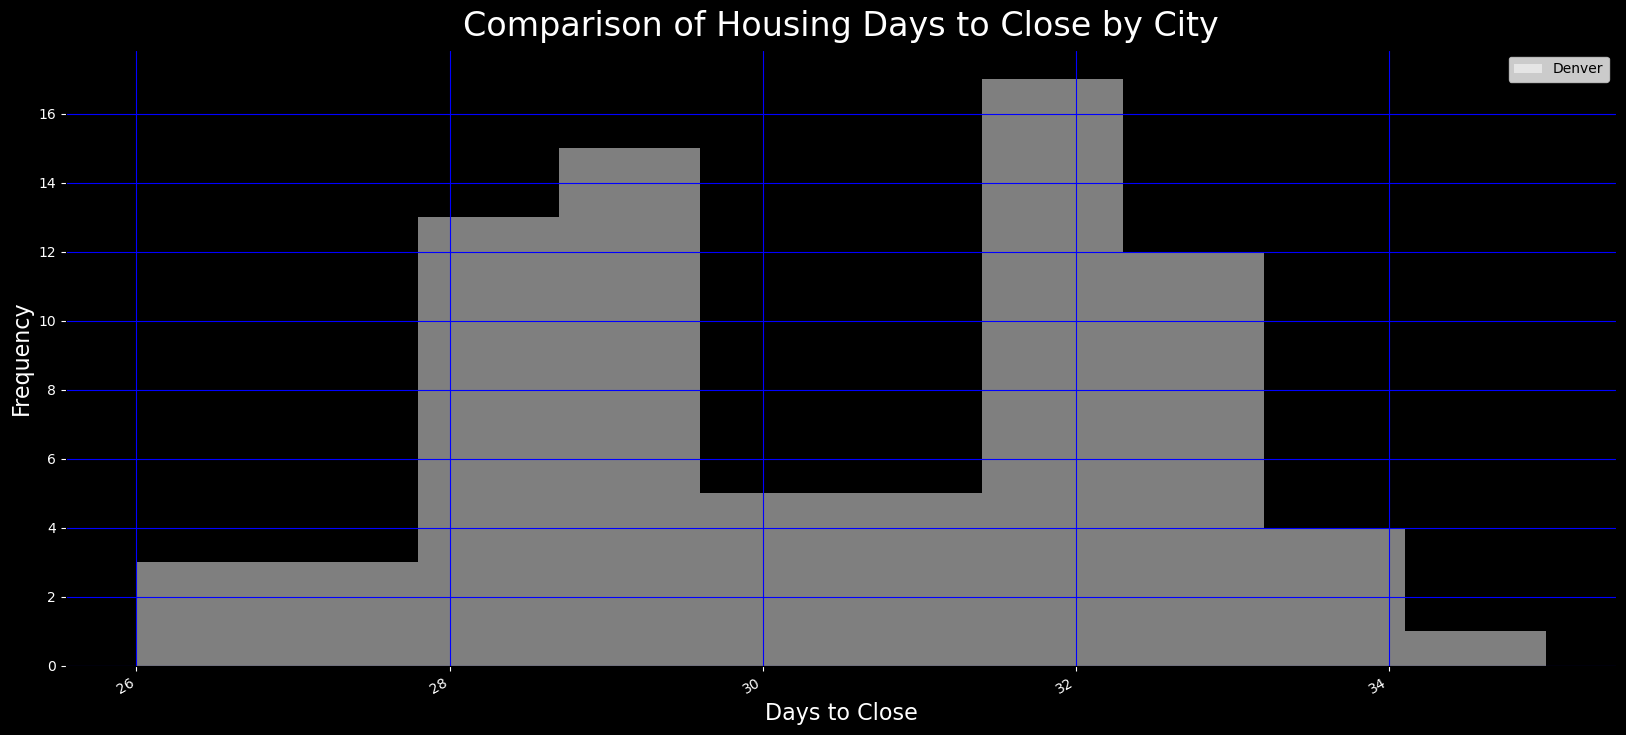

In [10]:
img, ax = plt.subplots(figsize=(20, 8))

# Histogram for Denver
plt.hist(denver_df['DaysToClose'], bins=10, alpha=0.5, label='Denver', color='#FFFFFF')

# Setting labels, title, and grid
plt.xlabel('Days to Close', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Comparison of Housing Days to Close by City', fontsize=24, pad=10)
plt.legend(loc='best')
plt.grid(True, color='blue')

# Update axes to cleaner labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

#Adjust style values to match dark theme
img.patch.set_facecolor('black')
ax.set_facecolor('black')

#Adjust style values to match dark theme
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Create output
plt.show()

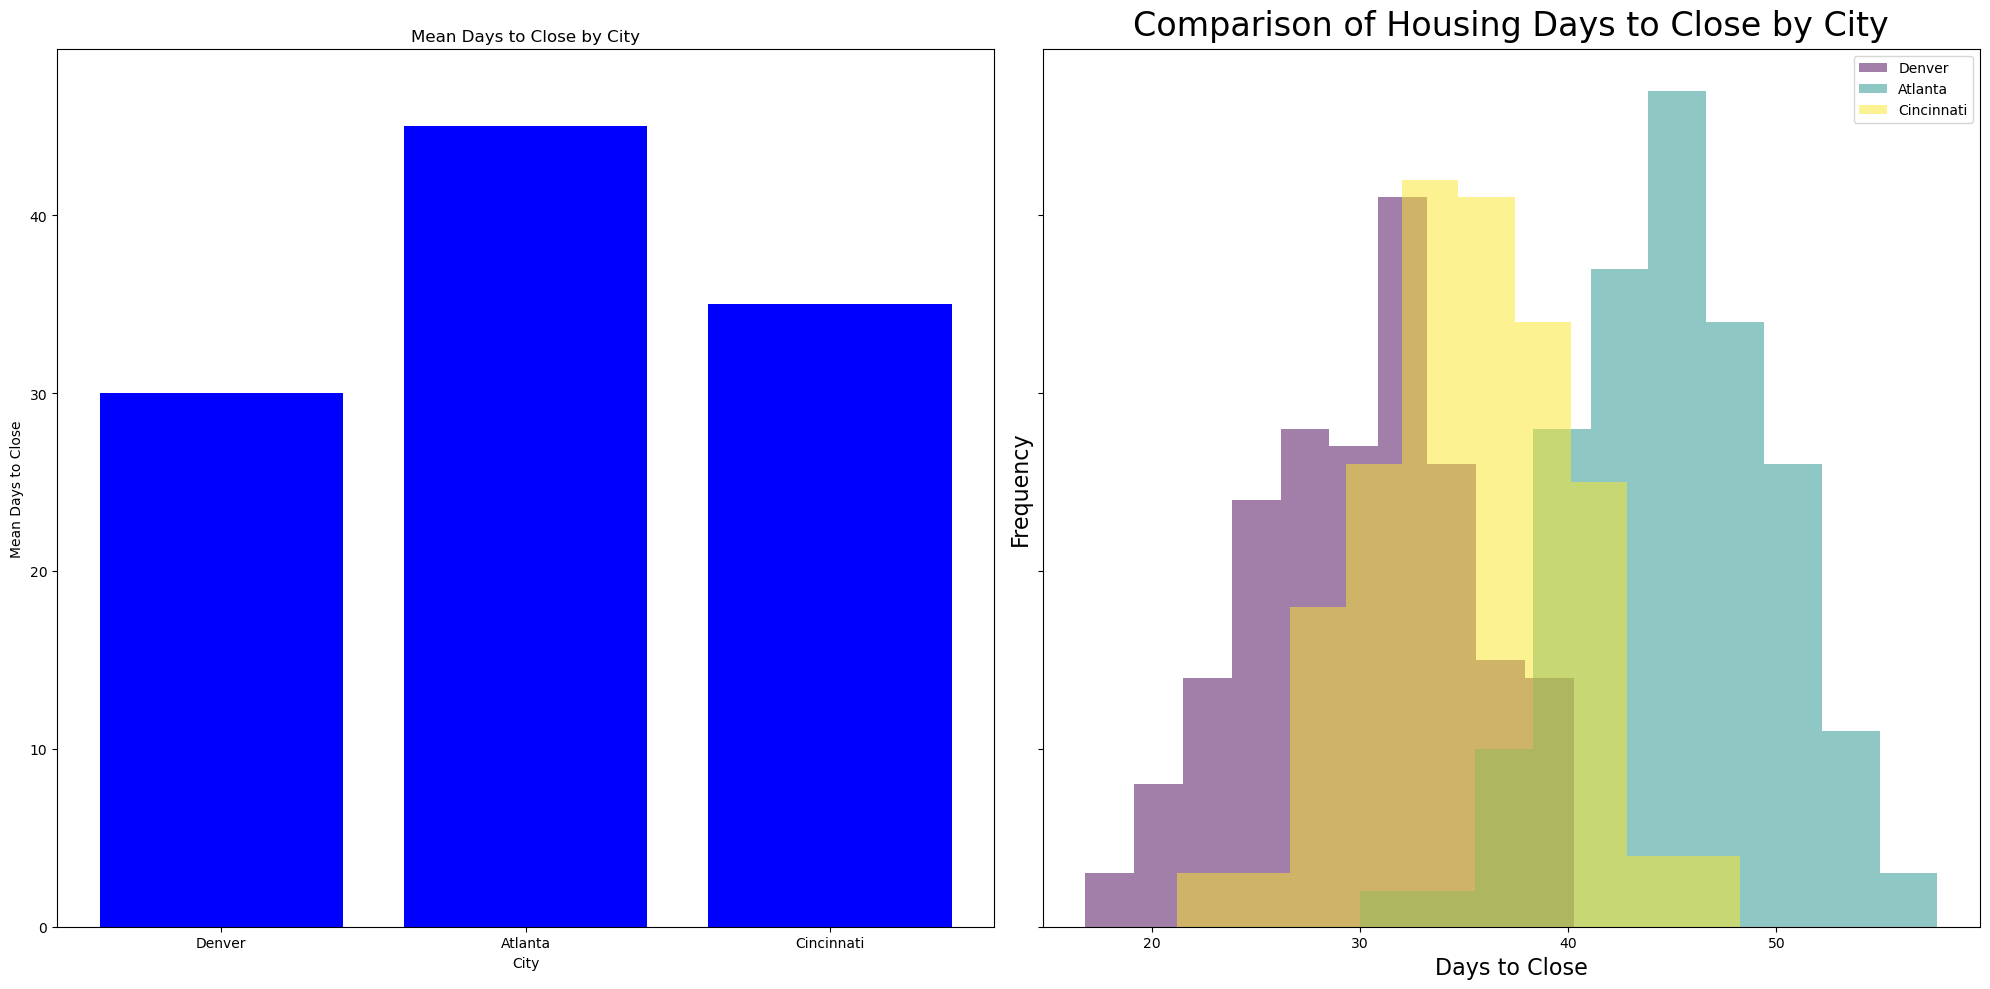

In [11]:
# Example DataFrame for three cities
data = {
    'Denver': np.random.normal(loc=30, scale=5, size=200),
    'Atlanta': np.random.normal(loc=45, scale=5, size=200),
    'Cincinnati': np.random.normal(loc=35, scale=5, size=200)
}

# Define the figure and the layout
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# Bar chart for Mean Days to Close
city_data = {'City': ['Denver', 'Atlanta', 'Cincinnati'],
             'MeanDaysToClose': [30, 45, 35]}
city_df = pd.DataFrame(city_data)

axes[0].bar(city_df['City'], city_df['MeanDaysToClose'], color='blue')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Mean Days to Close')
axes[0].set_title('Mean Days to Close by City')

# Histograms for each city with colormap
n_bins = 10
colors = plt.cm.viridis(np.linspace(0, 1, len(data)))

for (city, values), color in zip(data.items(), colors):
    n, bins, patches = axes[1].hist(values, bins=n_bins, alpha=0.5, label=city, color=color)
    for patch in patches:
        patch.set_facecolor(color)

axes[1].set_xlabel('Days to Close', fontsize=16)
axes[1].set_ylabel('Frequency', fontsize=16)
axes[1].set_title('Comparison of Housing Days to Close by City', fontsize=24, pad=10)
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


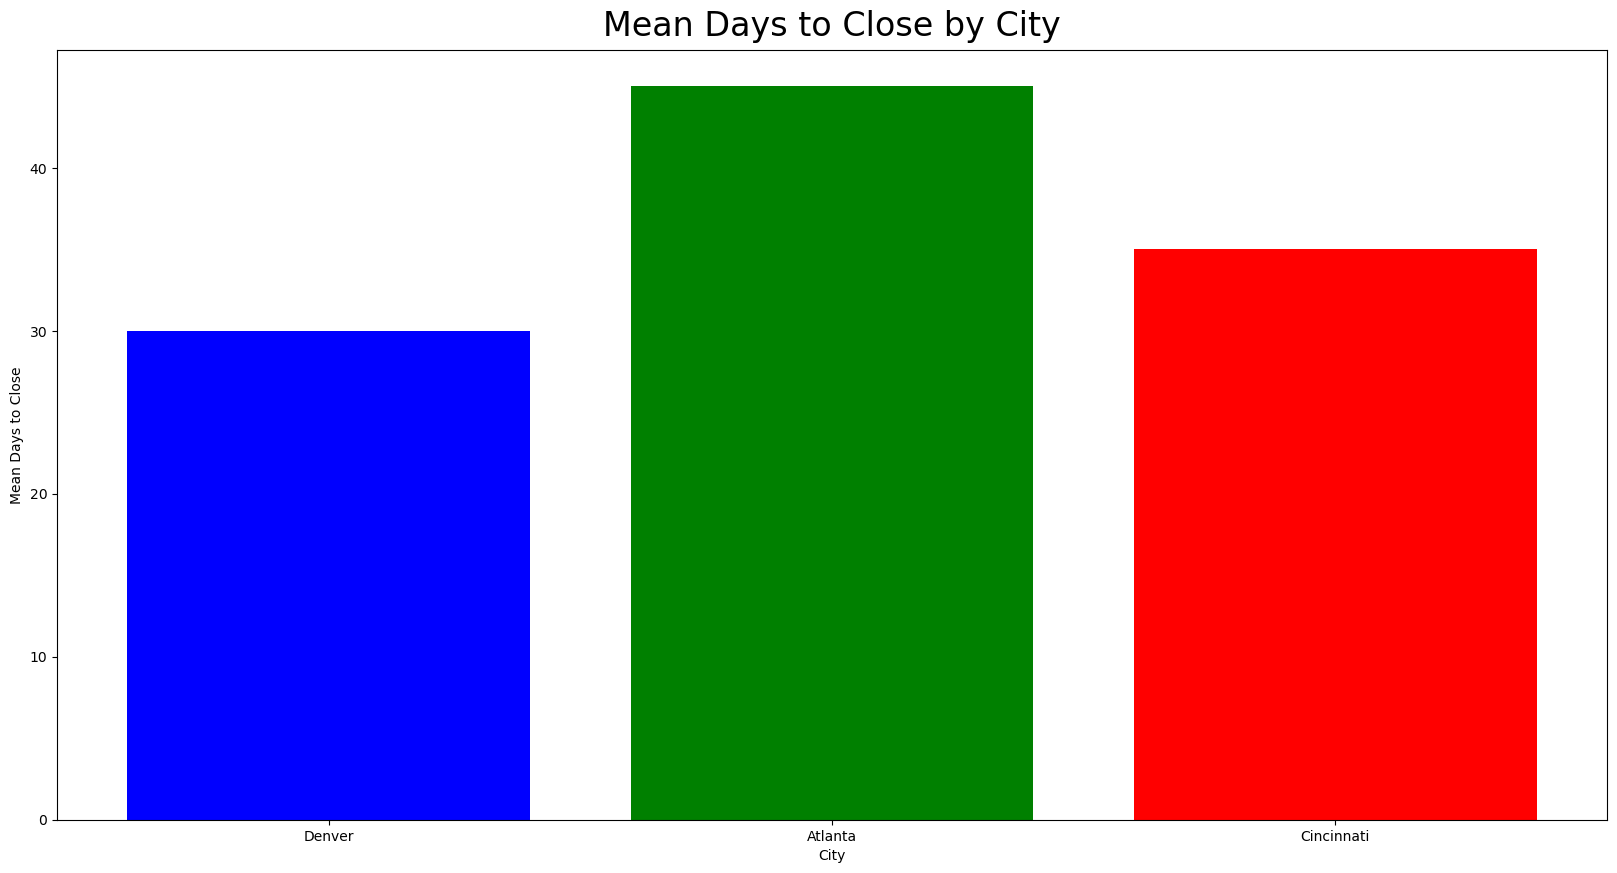

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame structure
city_data = {
    'City': ['Denver', 'Atlanta', 'Cincinnati'],
    'MeanDaysToClose': [30, 45, 35]
}
city_df = pd.DataFrame(city_data)

# Define figure size
plt.figure(figsize=(20, 10))

# Colors for each city
colors = ['blue', 'green', 'red']

# Creating a bar chart with individual colors
plt.bar(city_df['City'], city_df['MeanDaysToClose'], color=colors)

# Set labels and title with customization
plt.xlabel('City')
plt.ylabel('Mean Days to Close')
plt.title('Mean Days to Close by City', fontsize=24, pad=10)

# Display the plot
plt.show()


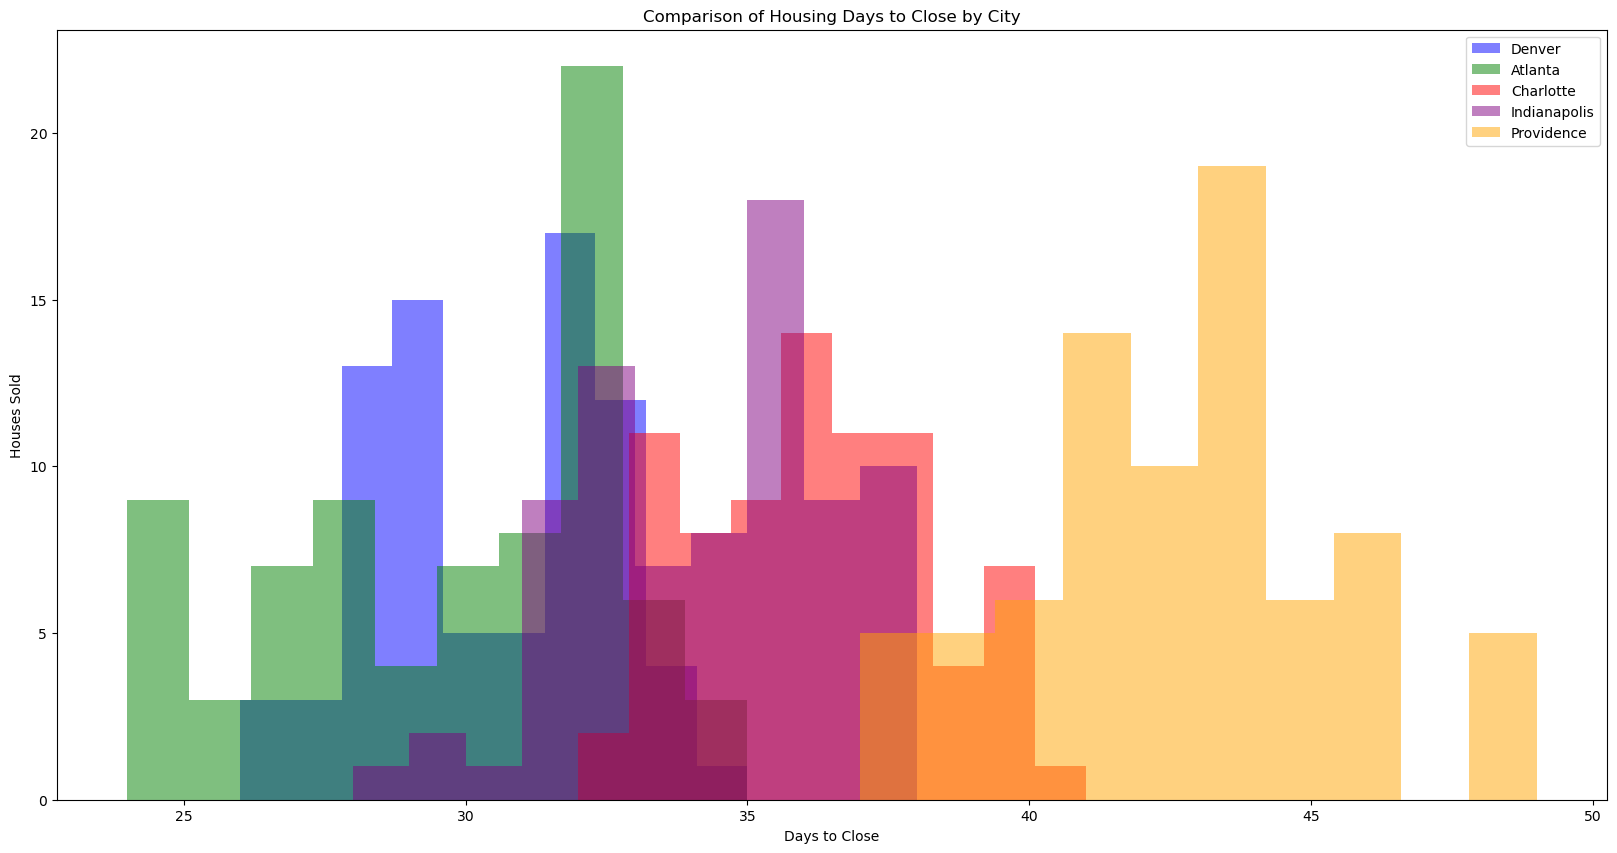

In [13]:
plt.figure(figsize=(20, 10))

# Histogram for Denver
plt.hist(denver_df['DaysToClose'], bins=10, alpha=0.5, label='Denver', color='blue')

# Histogram for Atlanta
plt.hist(atlanta_df['DaysToClose'], bins=10, alpha=0.5, label='Atlanta', color='green')

# Histogram for Charlotte
plt.hist(charlotte_df['DaysToClose'], bins=10, alpha=0.5, label='Charlotte', color='red')

# Histogram for Indianpolis
plt.hist(indi_df['DaysToClose'], bins=10, alpha=0.5, label='Indianapolis', color='purple')

# Histogram for Providence
plt.hist(prov_df['DaysToClose'], bins=10, alpha=0.5, label='Providence', color='orange')

plt.xlabel('Days to Close')
plt.ylabel('Houses Sold')
plt.title('Comparison of Housing Days to Close by City')
plt.legend(loc='best')
plt.grid(False)
plt.show()

In [14]:
""" 
Histogram not describing what I want it to — need to find means to simplify graphic 
"""

' \nHistogram not describing what I want it to — need to find means to simplify graphic \n'

In [15]:
# from tkinter import *
# from tkinter.ttk import *
# import matplotlib
# matplotlib.use("TkAgg")
# from matplotlib.figure import Figure 
# # OO backend (Tkinter) tkagg() function:
# from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
# root = Tk()
# figure = Figure(figsize=(5, 4), dpi=100)
# plot = figure.add_subplot(1, 1, 1)
# x = [ 0.1, 0.2, 0.3, 0.4 ]
# y = [ -0.1, -0.2, -0.3, -0.4 ]
# plot.plot(x, y, color="red", marker="o",  linestyle="--")
# canvas = FigureCanvasTkAgg(figure, root)
# canvas.get_tk_widget().grid(row=0, column=0)
# root.mainloop()

### Cities by Feature

In [16]:
combined_cities_dict = {
    'Denver': denver_df,
    'Atlanta': atlanta_df,
    'Charlotte': charlotte_df,
    'Cincinnati': cincinnati_df,
    'Indianapolis': indi_df,
    'Providence': prov_df,
    'Tampa': tampa_df
}

display(combined_cities_dict)

{'Denver':            DATE  MeanSalePrice  SalesCount  TotalTransactionValue  \
 0    2008-04-30       245069.0      4305.0           9.275848e+08   
 1    2008-05-31       242919.0      4779.0           1.043794e+09   
 2    2008-06-30       245529.0      4789.0           1.136320e+09   
 3    2008-07-31       247607.0      4922.0           1.195890e+09   
 4    2008-08-31       246384.0      4333.0           1.154412e+09   
 ..          ...            ...         ...                    ...   
 190  2024-02-29       635082.0      2767.0           1.507124e+09   
 191  2024-03-31       654724.0      3327.0           1.776480e+09   
 192  2024-04-30       682101.0      3660.0           2.225136e+09   
 193  2024-05-31       695652.0      4050.0           2.560065e+09   
 194  2024-06-30       700544.0      3695.0           2.662607e+09   
 
      HomeValueIndex  HomeValueIndexSmSa  MarketTempIdx  DaysToClose  \
 0     239786.727396       243635.279120            NaN          NaN   
 1  

In [17]:
mean_days_to_close = {}

# Loop through each city and its corresponding DataFrame
for city, df in combined_cities_dict.items():
    mean_days_to_close[city] = df['DaysToClose'].mean()

# convert to df
mean_days_to_close_df = pd.DataFrame(list(mean_days_to_close.items()), columns=['City', 'MeanDaysToClose'])

print(mean_days_to_close_df)

# # Highlight the Min values in each column 
# print("\nModified Stlying DataFrame:")
# df.style.highlight_min(axis=0)

           City  MeanDaysToClose
0        Denver        30.435897
1       Atlanta        29.769231
2     Charlotte        36.153846
3    Cincinnati        35.487179
4  Indianapolis        33.846154
5    Providence        42.551282
6         Tampa        35.333333


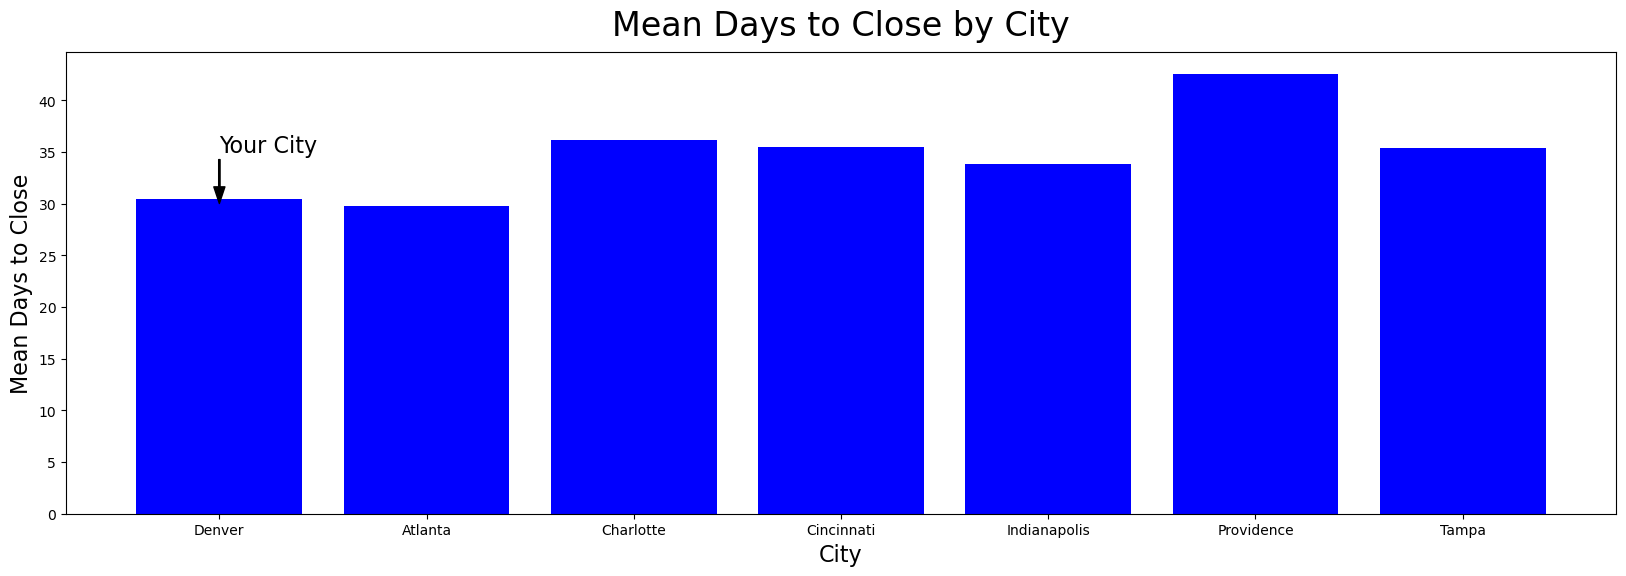

<Figure size 640x480 with 0 Axes>

In [18]:
mean_days_to_close_df = pd.DataFrame(list(mean_days_to_close.items()), columns=['City', 'MeanDaysToClose'])

# Creating a bar chart
plt.figure(figsize=(20, 6))
plt.bar(mean_days_to_close_df['City'], mean_days_to_close_df['MeanDaysToClose'], color='blue')
# plt.hist(x=0, bins=10, width=0.5)
plt.xlabel('City', fontsize=16)
plt.ylabel('Mean Days to Close', fontsize=16)
plt.title('Mean Days to Close by City', fontsize=24, pad=12)

# Add annotation
plt.annotate('Your City', xy=('Denver', 30), xytext=('Denver', 35), fontsize=16, arrowprops={'width':1,'headwidth':8,'color':'black'})

# output
plt.show()
plt.savefig('dtc_compare.png') 

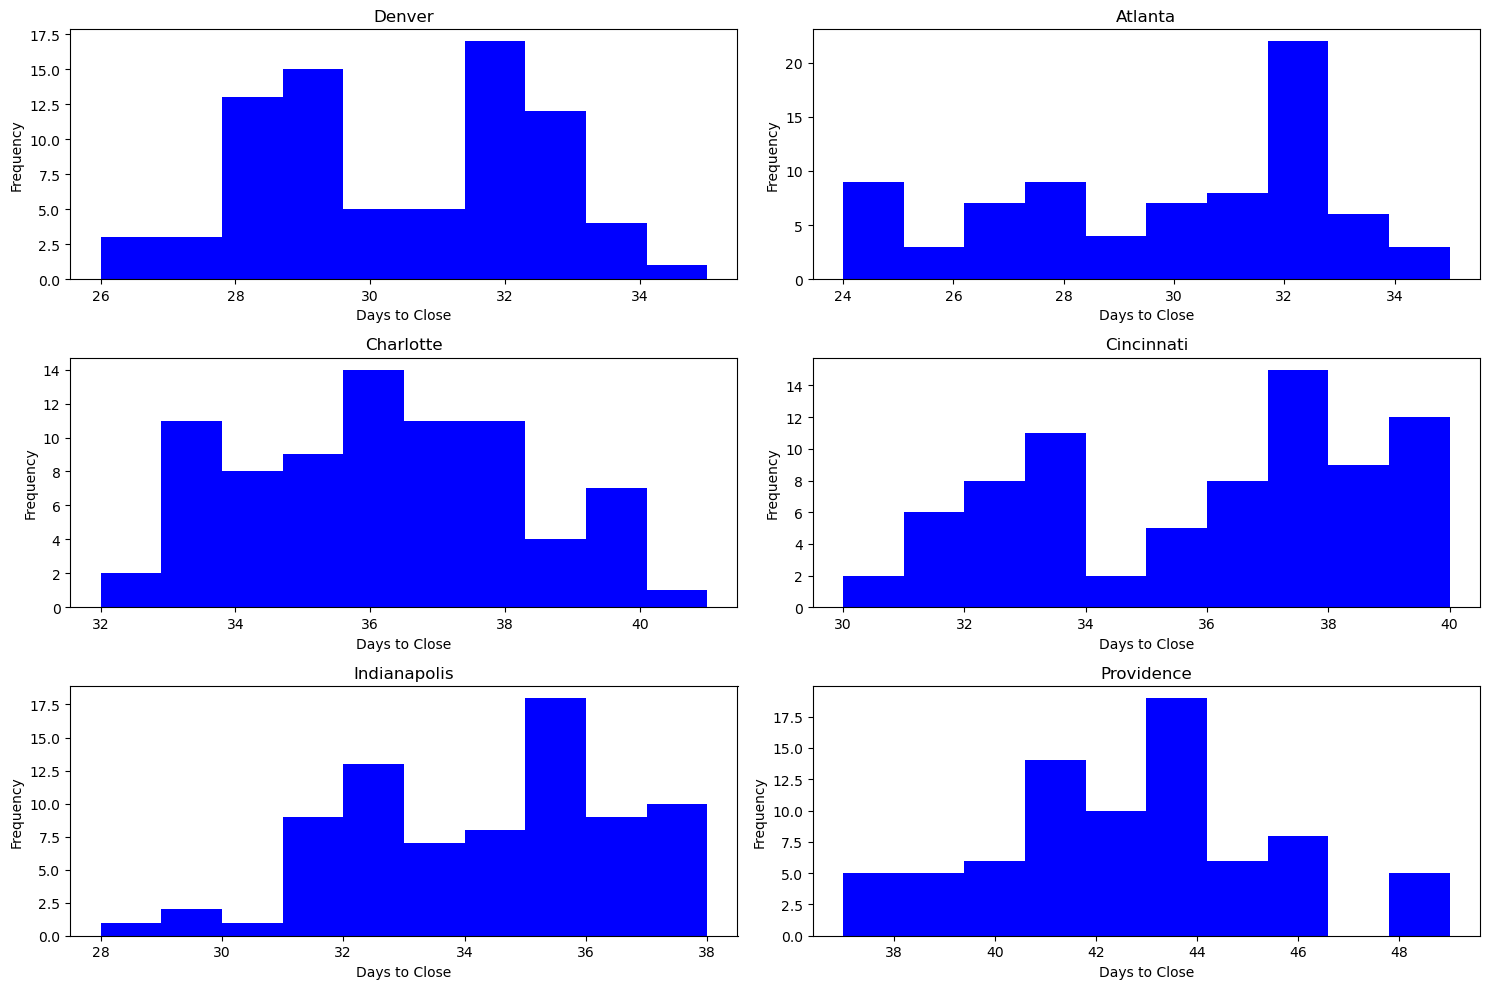

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for ax, (city, df) in zip(axes, combined_cities_dict.items()):
    ax.hist(df['DaysToClose'], bins=10, color='blue')
    ax.set_title(f'{city}')
    ax.set_xlabel('Days to Close')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [20]:
sales_count = {}

# Loop through each city and its corresponding DataFrame
for city, df in combined_cities_dict.items():
    sales_count[city] = df['SalesCount'].mean()

# convert to df
sales_count_df = pd.DataFrame(list(sales_count.items()), columns=['City', 'SalesCount'])

print(sales_count_df)

           City   SalesCount
0        Denver  4263.646154
1       Atlanta  8501.969231
2     Charlotte  3435.620513
3    Cincinnati  2502.845361
4  Indianapolis  2750.097436
5    Providence  1492.523077
6         Tampa  4924.728205


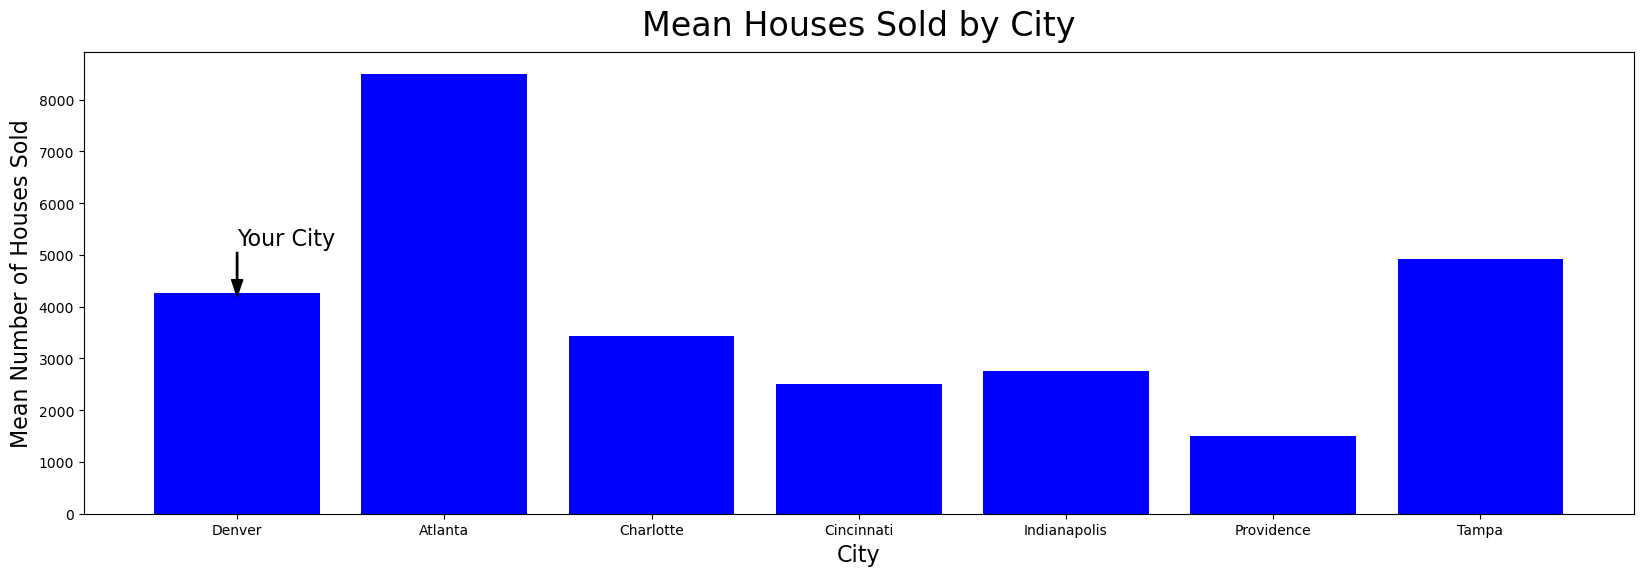

<Figure size 640x480 with 0 Axes>

In [21]:
sales_count_df = pd.DataFrame(list(sales_count.items()), columns=['City', 'SalesCount'])

# Creating a bar chart
plt.figure(figsize=(20, 6))
plt.bar(sales_count_df['City'], sales_count_df['SalesCount'], color='blue')
# plt.hist(x=0, bins=10, width=0.5)
plt.xlabel('City', fontsize=16)
plt.ylabel('Mean Number of Houses Sold', fontsize=16)
plt.title('Mean Houses Sold by City', fontsize=24, pad=12)

# Add annotation
plt.annotate('Your City', xy=('Denver', 4200), xytext=('Denver', 5200), fontsize=16, arrowprops={'width':1,'headwidth':8,'color':'black'})

# output
plt.show()
plt.savefig('../outputs/houses_sold.png')

In [21]:
market_temp_cities = {}

# Loop through each city and its corresponding DataFrame
for city, df in combined_cities_dict.items():
    market_temp_cities[city] = df['MarketTempIdx']

# convert to df
market_temp_cities_df = pd.DataFrame(list(market_temp_cities.items()), columns=['City', 'MarketTempIdx'])

print(market_temp_cities_df)

           City                                      MarketTempIdx
0        Denver  0     74.0
1     72.0
2     71.0
3     70.0
4 ...
1       Atlanta  0     53.0
1     52.0
2     53.0
3     56.0
4 ...
2     Charlotte  0     53.0
1     52.0
2     53.0
3     54.0
4 ...
3    Cincinnati  0     42.0
1     43.0
2     46.0
3     50.0
4 ...
4  Indianapolis  0     44.0
1     44.0
2     50.0
3     58.0
4 ...
5    Providence  0     52.0
1     53.0
2     58.0
3     61.0
4 ...


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (6, 78).

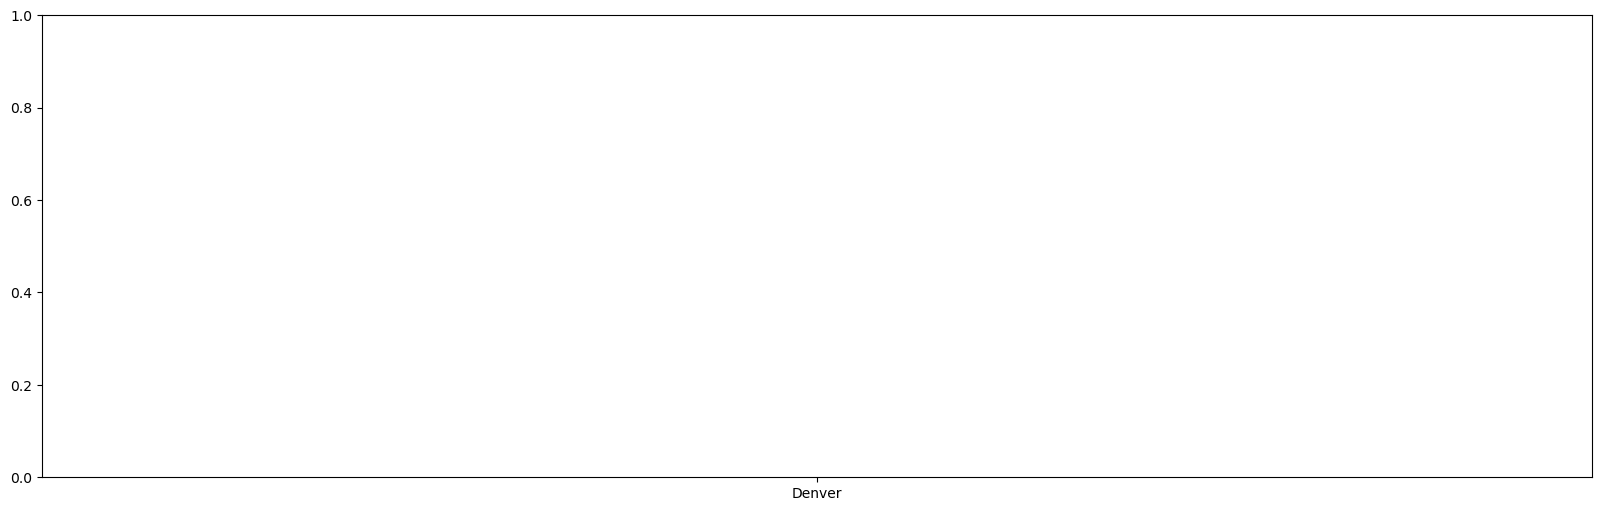

In [22]:
market_temp_cities_df = pd.DataFrame(list(market_temp_cities.items()), columns=['City', 'MarketTempIdx'])

# Creating a bar chart
plt.figure(figsize=(20, 6))
plt.bar(market_temp_cities_df['City'], market_temp_cities_df['MarketTempIdx'], color='blue')
# plt.hist(x=0, bins=10, width=0.5)
plt.xlabel('City', fontsize=16)
plt.ylabel('Market Temperature by City', fontsize=16)
plt.title('Market Temp Index', fontsize=24, pad=12)

# Add annotation
plt.annotate('Your City', xy=('Denver', 100), xytext=('Denver', 120), fontsize=16, arrowprops={'width':1,'headwidth':8,'color':'black'})

# output
plt.show()
plt.savefig('../outputs/houses_sold.png')

# Modeling